#

# Aktienanalyse

Laden wir zunächst die Aktienkurse der letzten Jahre und analysieren diese.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-access

In [2]:
import pandas_datareader.data as web
import os
import datetime

start = datetime.datetime(2015, 1, 1)

end = datetime.datetime(2019, 12, 31)

df = web.get_data_tiingo('CSCO', start=start, end=end, api_key='2a63c08d0b8317b023013f93caf899c67d09304e')


In [3]:
# lesen aus einer lokalen Datei!
# df = pd.read_csv('time_data/walmart_stock.csv',index_col='Date',parse_dates=True)

In [4]:
df.head()

close   high    low    open    volume  \
symbol date                                                               
CSCO   2015-01-02 00:00:00+00:00  27.61  28.12  27.38  27.860  22926512   
       2015-01-05 00:00:00+00:00  27.06  27.45  27.00  27.320  29460603   
       2015-01-06 00:00:00+00:00  27.05  27.68  27.04  27.135  47297634   
       2015-01-07 00:00:00+00:00  27.30  27.40  26.98  27.140  27570801   
       2015-01-08 00:00:00+00:00  27.51  28.09  27.47  27.540  40906993   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
CSCO   2015-01-02 00:00:00+00:00  22.966611  23.390841  22.775292  23.174567   
       2015-01-05 00:00:00+00:00  22.509109  22.833520  22.459200  22.725383   
       2015-01-06 00:00:00+00:00  22.500791  23.024839  22.492473  22.571496   
       2015-01-07 00:00:00+00:00  22.708746  22.791929  22.442563  22.575655   
       2015-01-08 00:00:00+00:00  22.883429  23.365886  22.850156  22.908384   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
CSCO   2015-01-02 00:00:00+00:00   22926512     0.19          1.0  
       2015-01-05 00:00:00+00:00   29460603     0.00          1.0  
       2015-01-06 00:00:00+00:00   47297634     0.00          1.0  
       2015-01-07 00:00:00+00:00   27570801     0.00          1.0  
       2015-01-08 00:00:00+00:00   40906993     0.00          1.0

In [5]:
df = df.droplevel(0)
df.index = df.index.strftime('%Y-%m-%d')

In [6]:
df.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
2015-01-02,27.61,28.12,27.38,27.860,22926512,22.966611,23.390841,22.775292,23.174567,22926512,0.19,1.0
2015-01-05,27.06,27.45,27.00,27.320,29460603,22.509109,22.833520,22.459200,22.725383,29460603,0.00,1.0
2015-01-06,27.05,27.68,27.04,27.135,47297634,22.500791,23.024839,22.492473,22.571496,47297634,0.00,1.0
2015-01-07,27.30,27.40,26.98,27.140,27570801,22.708746,22.791929,22.442563,22.575655,27570801,0.00,1.0
2015-01-08,27.51,28.09,27.47,27.540,40906993,22.883429,23.365886,22.850156,22.908384,40906993,0.00,1.0


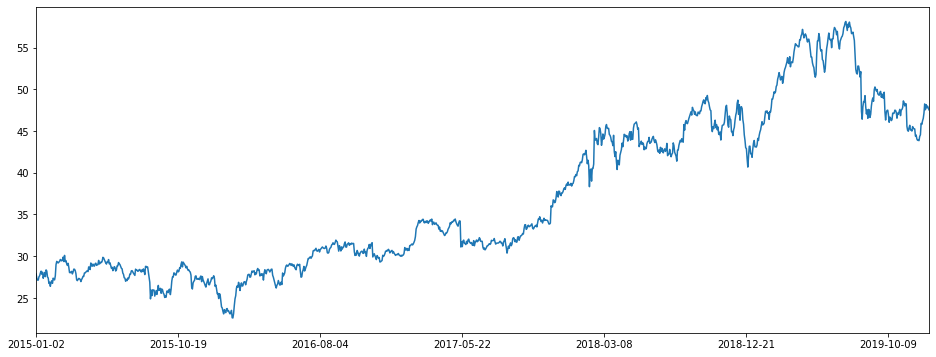

In [7]:
df['open'].plot(figsize=(16,6))

In [8]:
(35.475297+35.758296)/2

35.6167965

Fügen wir jetzt einen gleitenden Mittelwert ein! Diese "Rollmethode" bietet Zeileneinträge, wobei jeder Eintrag dann das jeweilige Fenster repräsentiert.

In [9]:
# 7-Tage gleitender Mittelwert
df.rolling(7).mean().head(20)

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-12,27.481429,27.858571,27.305714,27.523571,3.429850e+07,22.859663,23.173378,22.713500,22.894718,3.429850e+07,0.027143,1.0
2015-01-13,27.550714,27.941429,27.380000,27.573571,3.617674e+07,22.917296,23.242301,22.775292,22.936309,3.617674e+07,0.000000,1.0
2015-01-14,27.673571,28.027143,27.471429,27.647857,3.618157e+07,23.019491,23.313600,22.851344,22.998102,3.618157e+07,0.000000,1.0
2015-01-15,27.725000,28.100714,27.515714,27.784286,3.364206e+07,23.062271,23.374798,22.888182,23.111586,3.364206e+07,0.000000,1.0


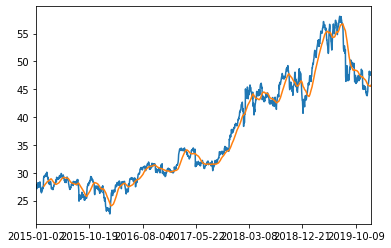

In [10]:
df['open'].plot()
df.rolling(window=30).mean()['close'].plot()

Die einfachste Art eine Legende einzufügen ist, den Rollwert in eine eigene Spalte einzufügen. Pandas macht dann den Rest automatisch!

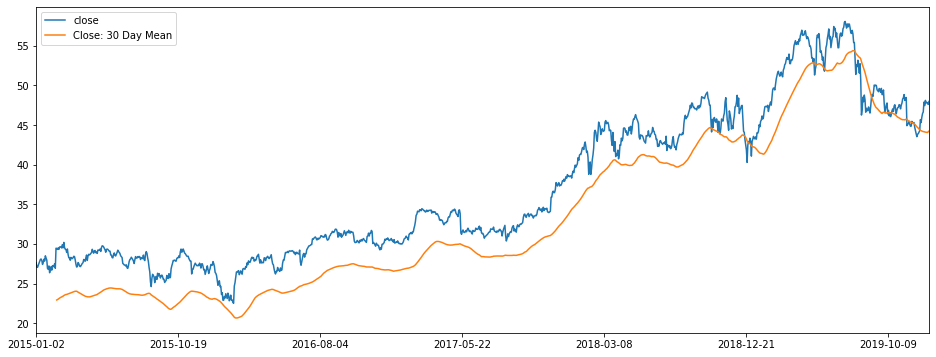

In [11]:
df['Close: 30 Day Mean'] = df['adjClose'].rolling(window=30).mean()
df[['close','Close: 30 Day Mean']].plot(figsize=(16,6))

MAs (Moving Averages = Gleitende Durchschnitte). Stelle den MA50 und MA200 für die Aktie dar.

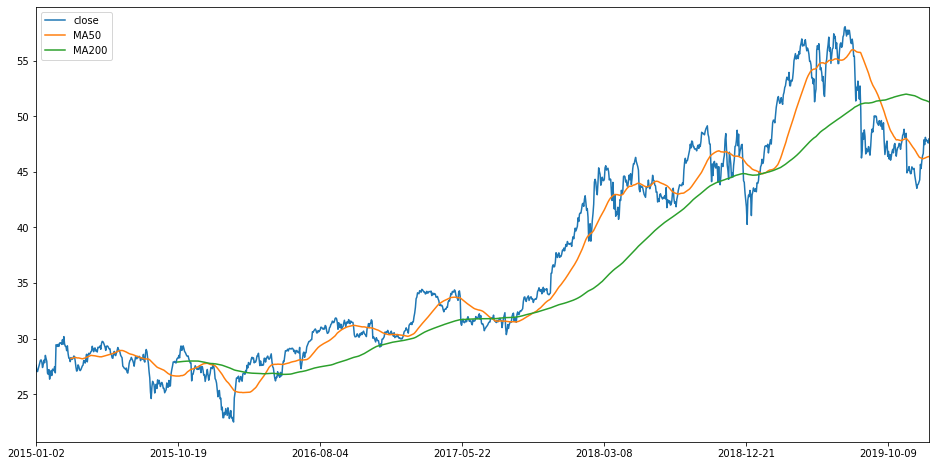

In [12]:
df['MA50'] = df['close'].rolling(50).mean()
df['MA200'] = df['close'].rolling(200).mean()
df[['close','MA50','MA200']].plot(label='Aktie',figsize=(16,8))

## Bollinger  Bänder (Bollinger Bands)

Wir werden noch weiter über Finanzanalysediagramme und technische Indikatoren sprechen, aber das hier ist es wert, dass wir es uns jetzt ansehen!

Mehr Informationen : http://www.investopedia.com/terms/b/bollingerbands.asp

*Entwickelt von John Bollinger sind Bollinger Bänder®  Volatilitätsbänder (volatility bands), die über und unter einem gleitenden Mittelwert platziert werden. Volatilität basiert auf der Standardabweichung, die sich ändert, wenn sich die Volatilität erhöht oder verringert. Die Bänder werden automatisch breiter, wenn die Volatilität steigt und enger, wenn sie sinkt. Diese dynamische Eigenschaft der Bollinger Bänder bedeutet auch, dass sie auf verschiedene Wertpapiere mit Standardeinstellungen angewendet werden können. Bollinger Bänder können bei Signalen benutzt werden, um Hochs und Tiefs oder die Stärke des Trends zu bestimmen.*

*Bollinger Bänder zeigen die Richtung mit dem 20-Perioden SMA (simple moving average) und die Volatilität mit den oberen und unteren Bändern an. Daher können sie benutzt werden, um zu bestimmen, ob Preise eher hoch oder niedrig sind. Laut Bollinger sollen die Bänder 88-89% der Preisaktion beinhalten, was eine Handlung außerhalb der Bänder signifikant macht. Technisch gesehen sind Preise relativ hoch, wenn sie über dem oberen Band liegen und relativ niedrig, wenn sie unter dem unteren liegen. Trotzdem, relativ hoch soll nicht als auf Baisse gerichtet oder als Verkaufssignal verstanden werden. Ebenso sollte relativ niedrig nicht als haussierend oder Kaufsignal interpretiert werden. Preise sind aus einem bestimmten Grund hoch oder niedrig. Genau wie andere Indikatoren sollten Bollinger Bänder nicht als alleiniges Werkzeug verwendet werden.*

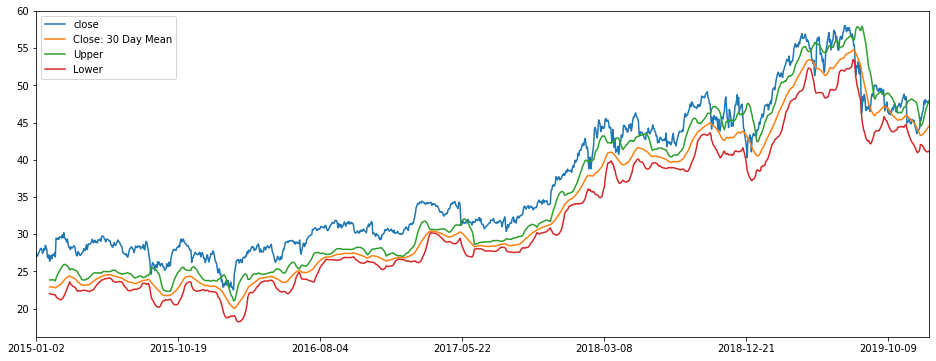

In [13]:
df['Close: 30 Day Mean'] = df['adjClose'].rolling(window=20).mean()
df['Upper'] = df['Close: 30 Day Mean'] + 2*df['adjClose'].rolling(window=20).std()
df['Lower'] = df['Close: 30 Day Mean'] - 2*df['adjClose'].rolling(window=20).std()
df[['close','Close: 30 Day Mean','Upper','Lower']].plot(figsize=(16,6))

Für Erweiterungsoperationen bringt es nicht wirklich viel, diese gegen die täglichen Daten aufzutragen. Aber trotzdem ist es eine gute Art, um zu sehen wie "stabil" eine Aktie ist. 

# MACD

In [14]:
#Calculate the MACD and Signal Line indicators
#Calculate the Short Term Exponential Moving Average
ShortEMA = df.close.ewm(span=21, adjust=False).mean() #AKA Fast moving average #12
#Calculate the Long Term Exponential Moving Average
LongEMA = df.close.ewm(span=70, adjust=False).mean() #AKA Slow moving average # 26
#Calculate the Moving Average Convergence/Divergence (MACD)
MACD = ShortEMA - LongEMA
#Calcualte the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

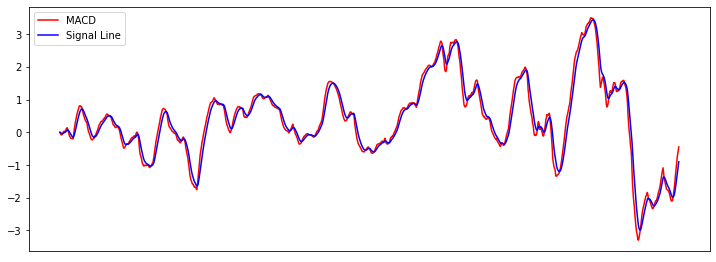

In [15]:
plt.figure(figsize=(12.2,4.5)) 
plt.plot(df.index, MACD, label='MACD', color = 'red')
plt.plot(df.index, signal, label='Signal Line', color='blue')
plt.xticks([])
plt.legend(loc='upper left')
plt.show()

In [16]:
#Create new columns for the data frame 
df['MACD'] = MACD
df['Signal Line'] = signal
#Show the new data frame
df

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,Close: 30 Day Mean,MA50,MA200,Upper,Lower,MACD,Signal Line
2015-01-02,27.61,28.12,27.38,27.860,22926512,22.966611,23.390841,22.775292,23.174567,22926512,0.19,1.0,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2015-01-05,27.06,27.45,27.00,27.320,29460603,22.509109,22.833520,22.459200,22.725383,29460603,0.00,1.0,NaN,NaN,NaN,NaN,NaN,-0.034507,-0.006901
2015-01-06,27.05,27.68,27.04,27.135,47297634,22.500791,23.024839,22.492473,22.571496,47297634,0.00,1.0,NaN,NaN,NaN,NaN,NaN,-0.065532,-0.018628
2015-01-07,27.30,27.40,26.98,27.140,27570801,22.708746,22.791929,22.442563,22.575655,27570801,0.00,1.0,NaN,NaN,NaN,NaN,NaN,-0.077090,-0.030320
2015-01-08,27.51,28.09,27.47,27.540,40906993,22.883429,23.365886,22.850156,22.908384,40906993,0.00,1.0,NaN,NaN,NaN,NaN,NaN,-0.073928,-0.039042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,47.78,48.25,47.65,48.160,7044728,46.215073,46.669679,46.089331,46.582627,7044728,0.00,1.0,43.990888,46.2968,51.40335,46.847993,41.133783,-0.881754,-1.378657
2019-12-26,47.85,48.00,47.65,47.780,11122017,46.282780,46.427868,46.089331,46.215073,11122017,0.00,1.0,44.113728,46.3266,51.37965,47.146818,41.080639,-0.751377,-1.253201
2019-12-27,47.77,48.02,47.68,47.990,11058982,46.205401,46.447212,46.118348,46.418195,11058982,0.00,1.0,44.236085,46.3462,51.35480,47.403272,41.068899,-0.639285,-1.130418
2019-12-30,47.59,47.88,47.29,47.750,12129049,46.031296,46.311798,45.741122,46.186056,12129049,0.00,1.0,44.346351,46.3574,51.32675,47.605638,41.087065,-0.549911,-1.014316


In [17]:
#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(signal)):
    #if MACD > signal line  then buy else sell
      if signal['MACD'][i] > signal['Signal Line'][i]:
        if flag != 1:
          sigPriceBuy.append(signal['close'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      elif signal['MACD'][i] < signal['Signal Line'][i]: 
        if flag != 0:
          sigPriceSell.append(signal['close'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      else: #Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [18]:
#Create buy and sell columns
x = buy_sell(df)
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price'] = x[1]
#Show the data frame
df

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,...,splitFactor,Close: 30 Day Mean,MA50,MA200,Upper,Lower,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2015-01-02,27.61,28.12,27.38,27.860,22926512,22.966611,23.390841,22.775292,23.174567,22926512,...,1.0,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
2015-01-05,27.06,27.45,27.00,27.320,29460603,22.509109,22.833520,22.459200,22.725383,29460603,...,1.0,NaN,NaN,NaN,NaN,NaN,-0.034507,-0.006901,NaN,27.06
2015-01-06,27.05,27.68,27.04,27.135,47297634,22.500791,23.024839,22.492473,22.571496,47297634,...,1.0,NaN,NaN,NaN,NaN,NaN,-0.065532,-0.018628,NaN,NaN
2015-01-07,27.30,27.40,26.98,27.140,27570801,22.708746,22.791929,22.442563,22.575655,27570801,...,1.0,NaN,NaN,NaN,NaN,NaN,-0.077090,-0.030320,NaN,NaN
2015-01-08,27.51,28.09,27.47,27.540,40906993,22.883429,23.365886,22.850156,22.908384,40906993,...,1.0,NaN,NaN,NaN,NaN,NaN,-0.073928,-0.039042,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,47.78,48.25,47.65,48.160,7044728,46.215073,46.669679,46.089331,46.582627,7044728,...,1.0,43.990888,46.2968,51.40335,46.847993,41.133783,-0.881754,-1.378657,NaN,NaN
2019-12-26,47.85,48.00,47.65,47.780,11122017,46.282780,46.427868,46.089331,46.215073,11122017,...,1.0,44.113728,46.3266,51.37965,47.146818,41.080639,-0.751377,-1.253201,NaN,NaN
2019-12-27,47.77,48.02,47.68,47.990,11058982,46.205401,46.447212,46.118348,46.418195,11058982,...,1.0,44.236085,46.3462,51.35480,47.403272,41.068899,-0.639285,-1.130418,NaN,NaN
2019-12-30,47.59,47.88,47.29,47.750,12129049,46.031296,46.311798,45.741122,46.186056,12129049,...,1.0,44.346351,46.3574,51.32675,47.605638,41.087065,-0.549911,-1.014316,NaN,NaN


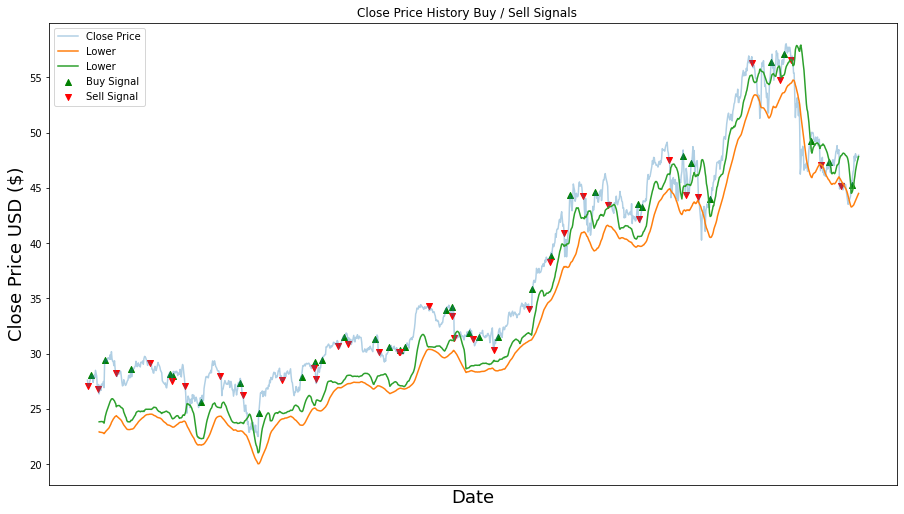

In [19]:
# Visually Show The Stock buy and sell signals
# Create the title 
title = 'Close Price History Buy / Sell Signals   '
#Get the stocks
my_stocks = df
  
#Create and plot the graph
plt.figure(figsize=(15.2,8.5)) #width = 12.2in, height = 4.5
plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( my_stocks['close'],  label='Close Price', alpha = 0.35)
plt.plot( df['Close: 30 Day Mean'],  label='Lower',)
plt.plot( df['Upper'],  label='Lower',)

plt.xticks([])
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()

In [20]:
df['close'].iloc[0]

27.61

In [21]:
(df['close'][-1] / df['close'].iloc[0] * 100) -100

73.70517928286853

In [22]:
actions = df[df.Buy_Signal_Price.notnull() |  df.Sell_Signal_Price.notnull()]

In [23]:
actions.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,...,splitFactor,Close: 30 Day Mean,MA50,MA200,Upper,Lower,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2015-01-05,27.060,27.45,27.00,27.32,29460603,22.509109,22.833520,22.459200,22.725383,29460603,...,1.0,NaN,NaN,NaN,NaN,NaN,-0.034507,-0.006901,NaN,27.060
2015-01-12,28.050,28.20,27.82,28.00,38648396,23.332613,23.457386,23.141294,23.291022,38648396,...,1.0,NaN,NaN,NaN,NaN,NaN,-0.018773,-0.037282,28.05,NaN
2015-01-28,26.805,27.60,26.80,27.39,32381676,22.296994,22.958293,22.292835,22.783610,32381676,...,1.0,NaN,NaN,NaN,NaN,NaN,0.017070,0.061461,NaN,26.805
2015-02-12,29.460,29.58,28.84,28.99,117439078,24.505482,24.605301,23.989752,24.114526,117439078,...,1.0,22.838095,NaN,NaN,24.048744,21.627446,-0.053767,-0.128792,29.46,NaN
2015-03-11,28.260,28.76,28.21,28.68,25160166,23.507296,23.923207,23.465705,23.856661,25160166,...,1.0,24.342237,NaN,NaN,25.482241,23.202234,0.668163,0.708279,NaN,28.260


In [24]:
revenue = list() 
for i in range(1, actions.shape[0] - 1):
    if not pd.isna(actions['Sell_Signal_Price'][i]):
        revenue.append((actions['Sell_Signal_Price'][i] / actions['Buy_Signal_Price'][i-1] * 100) - 100)
        
revenue.append((df['close'][-1] / actions['Buy_Signal_Price'][-1] * 100) -100)

In [25]:
sum(revenue)

26.895788319059946